### Import Libraries

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import scipy.stats as stats

!pip install plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=1.2)

!pip install heatmapz
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

### Read the Covid Super Data

In [2]:
covid_merged_data = pd.read_csv('../data/covid_large.csv')

In [3]:
#covid_merged_data= covid_merged_data[covid_merged_data['County Name'] != 'statewide unallocated']

In [4]:
covid_merged_data.head()

State  countyFIPS            County Name        Date  Num of Cases  \
0    AL           0  statewide unallocated  2020-01-22             0   
1    AL           0  statewide unallocated  2020-01-23             0   
2    AL           0  statewide unallocated  2020-01-24             0   
3    AL           0  statewide unallocated  2020-01-25             0   
4    AL           0  statewide unallocated  2020-01-26             0   

   Num of Deaths  population  
0              0           0  
1              0           0  
2              0           0  
3              0           0  
4              0           0

### Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific state.

In [5]:
#Filter all rows which are in the state of "North Carolina"
NC_data= covid_merged_data[covid_merged_data['State']=="NC"]
NC_data

State  countyFIPS            County Name        Date  Num of Cases  \
456225    NC           0  statewide unallocated  2020-01-22             0   
456226    NC           0  statewide unallocated  2020-01-23             0   
456227    NC           0  statewide unallocated  2020-01-24             0   
456228    NC           0  statewide unallocated  2020-01-25             0   
456229    NC           0  statewide unallocated  2020-01-26             0   
...      ...         ...                    ...         ...           ...   
480157    NC       37199          yancey county  2020-09-10           110   
480158    NC       37199          yancey county  2020-09-11           112   
480159    NC       37199          yancey county  2020-09-12           113   
480160    NC       37199          yancey county  2020-09-13           114   
480161    NC       37199          yancey county  2020-09-14           116   

        Num of Deaths  population  
456225              0           0  
456226              0           0  
456227              0           0  
456228              0           0  
456229              0           0  
...               ...         ...  
480157              0       18069  
480158              0       18069  
480159              0       18069  
480160              0       18069  
480161              0       18069  

[23937 rows x 7 columns]

In [6]:
#Calculate new cases
NC_data['Num of Cases per day'] = NC_data['Num of Cases'].diff()
NC_data['Num of Death per day'] = NC_data['Num of Deaths'].diff()
NC_data

/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


State  countyFIPS            County Name        Date  Num of Cases  \
456225    NC           0  statewide unallocated  2020-01-22             0   
456226    NC           0  statewide unallocated  2020-01-23             0   
456227    NC           0  statewide unallocated  2020-01-24             0   
456228    NC           0  statewide unallocated  2020-01-25             0   
456229    NC           0  statewide unallocated  2020-01-26             0   
...      ...         ...                    ...         ...           ...   
480157    NC       37199          yancey county  2020-09-10           110   
480158    NC       37199          yancey county  2020-09-11           112   
480159    NC       37199          yancey county  2020-09-12           113   
480160    NC       37199          yancey county  2020-09-13           114   
480161    NC       37199          yancey county  2020-09-14           116   

        Num of Deaths  population  Num of Cases per day  Num of Death per day  
456225              0           0                   NaN                   NaN  
456226              0           0                   0.0                   0.0  
456227              0           0                   0.0                   0.0  
456228              0           0                   0.0                   0.0  
456229              0           0                   0.0                   0.0  
...               ...         ...                   ...                   ...  
480157              0       18069                   2.0                   0.0  
480158              0       18069                   2.0                   0.0  
480159              0       18069                   1.0                   0.0  
480160              0       18069                   1.0                   0.0  
480161              0       18069                   2.0                   0.0  

[23937 rows x 9 columns]

In [7]:
#Drop the first date
NC_data= NC_data[NC_data['Date'] != '2020-01-22']
NC_data['Date'] = NC_data.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))


/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
NC_data

State  countyFIPS            County Name       Date  Num of Cases  \
456226    NC           0  statewide unallocated 2020-01-23             0   
456227    NC           0  statewide unallocated 2020-01-24             0   
456228    NC           0  statewide unallocated 2020-01-25             0   
456229    NC           0  statewide unallocated 2020-01-26             0   
456230    NC           0  statewide unallocated 2020-01-27             0   
...      ...         ...                    ...        ...           ...   
480157    NC       37199          yancey county 2020-09-10           110   
480158    NC       37199          yancey county 2020-09-11           112   
480159    NC       37199          yancey county 2020-09-12           113   
480160    NC       37199          yancey county 2020-09-13           114   
480161    NC       37199          yancey county 2020-09-14           116   

        Num of Deaths  population  Num of Cases per day  Num of Death per day  
456226              0           0                   0.0                   0.0  
456227              0           0                   0.0                   0.0  
456228              0           0                   0.0                   0.0  
456229              0           0                   0.0                   0.0  
456230              0           0                   0.0                   0.0  
...               ...         ...                   ...                   ...  
480157              0       18069                   2.0                   0.0  
480158              0       18069                   2.0                   0.0  
480159              0       18069                   1.0                   0.0  
480160              0       18069                   1.0                   0.0  
480161              0       18069                   2.0                   0.0  

[23836 rows x 9 columns]

In [9]:
NC_data_groupedBydate = NC_data.groupby("Date").sum().reset_index()

#NC_data_groupedBydate = NC_data_groupedBydate.fillna(0)
NC_data_groupedBydate

Date  countyFIPS  Num of Cases  Num of Deaths  population  \
0   2020-01-23     3710000             0              0    10488084   
1   2020-01-24     3710000             0              0    10488084   
2   2020-01-25     3710000             0              0    10488084   
3   2020-01-26     3710000             0              0    10488084   
4   2020-01-27     3710000             0              0    10488084   
..         ...         ...           ...            ...         ...   
231 2020-09-10     3710000        181917           2990    10488084   
232 2020-09-11     3710000        183449           3023    10488084   
233 2020-09-12     3710000        184902           3047    10488084   
234 2020-09-13     3710000        186095           3052    10488084   
235 2020-09-14     3710000        186936           3060    10488084   

     Num of Cases per day  Num of Death per day  
0                     0.0                   0.0  
1                     0.0                   0.0  
2                     0.0                   0.0  
3                     0.0                   0.0  
4                     0.0                   0.0  
..                    ...                   ...  
231                1225.0                  33.0  
232                1532.0                  33.0  
233                1453.0                  24.0  
234                1193.0                   5.0  
235                 841.0                   8.0  

[236 rows x 7 columns]

In [10]:
#Normalize the cases by population
NC_data_groupedBydate['Num of Cases per day normalized'] = (NC_data_groupedBydate['Num of Cases per day']/NC_data_groupedBydate['population'])*1000000
NC_data_groupedBydate['Num of Deaths per day normalized'] = (NC_data_groupedBydate['Num of Death per day']/NC_data_groupedBydate['population'])*1000000
NC_data_groupedBydate

Date  countyFIPS  Num of Cases  Num of Deaths  population  \
0   2020-01-23     3710000             0              0    10488084   
1   2020-01-24     3710000             0              0    10488084   
2   2020-01-25     3710000             0              0    10488084   
3   2020-01-26     3710000             0              0    10488084   
4   2020-01-27     3710000             0              0    10488084   
..         ...         ...           ...            ...         ...   
231 2020-09-10     3710000        181917           2990    10488084   
232 2020-09-11     3710000        183449           3023    10488084   
233 2020-09-12     3710000        184902           3047    10488084   
234 2020-09-13     3710000        186095           3052    10488084   
235 2020-09-14     3710000        186936           3060    10488084   

     Num of Cases per day  Num of Death per day  \
0                     0.0                   0.0   
1                     0.0                   0.0   
2                     0.0                   0.0   
3                     0.0                   0.0   
4                     0.0                   0.0   
..                    ...                   ...   
231                1225.0                  33.0   
232                1532.0                  33.0   
233                1453.0                  24.0   
234                1193.0                   5.0   
235                 841.0                   8.0   

     Num of Cases per day normalized  Num of Deaths per day normalized  
0                           0.000000                          0.000000  
1                           0.000000                          0.000000  
2                           0.000000                          0.000000  
3                           0.000000                          0.000000  
4                           0.000000                          0.000000  
..                               ...                               ...  
231                       116.799217                          3.146428  
232                       146.070531                          3.146428  
233                       138.538173                          2.288311  
234                       113.748136                          0.476731  
235                        80.186238                          0.762770  

[236 rows x 9 columns]

In [11]:
NC_weekly_data = NC_data_groupedBydate.groupby([ pd.Grouper(key='Date', freq='w')])['Num of Cases per day normalized','Num of Deaths per day normalized'].agg({'Num of Cases per day normalized':'mean',
                                                                                                'Num of Deaths per day normalized' :'mean'}).reset_index()
NC_weekly_data

Date  Num of Cases per day normalized  \
0  2020-01-26                         0.000000   
1  2020-02-02                         0.000000   
2  2020-02-09                         0.000000   
3  2020-02-16                         0.000000   
4  2020-02-23                         0.000000   
5  2020-03-01                         0.000000   
6  2020-03-08                         0.027242   
7  2020-03-15                         0.422248   
8  2020-03-22                         3.023840   
9  2020-03-29                        12.367777   
10 2020-04-05                        19.368920   
11 2020-04-12                        26.315579   
12 2020-04-19                        26.233853   
13 2020-04-26                        27.745773   
14 2020-05-03                        43.368945   
15 2020-05-10                        42.129444   
16 2020-05-17                        51.146479   
17 2020-05-24                        64.004609   
18 2020-05-31                        60.721972   
19 2020-06-07                       107.073895   
20 2020-06-14                       116.840080   
21 2020-06-21                       118.270274   
22 2020-06-28                       127.341794   
23 2020-07-05                       147.636935   
24 2020-07-12                       173.162501   
25 2020-07-19                       191.823134   
26 2020-07-26                       176.227204   
27 2020-08-02                       170.274870   
28 2020-08-09                       149.189717   
29 2020-08-16                       135.500713   
30 2020-08-23                       138.401964   
31 2020-08-30                       150.020592   
32 2020-09-06                       146.683472   
33 2020-09-13                       109.457552   
34 2020-09-20                        80.186238   

    Num of Deaths per day normalized  
0                           0.000000  
1                           0.000000  
2                           0.000000  
3                           0.000000  
4                           0.000000  
5                           0.000000  
6                           0.000000  
7                           0.000000  
8                           0.000000  
9                           0.054484  
10                          0.367764  
11                          0.667424  
12                          1.225881  
13                          1.743475  
14                          1.675371  
15                          1.688992  
16                          1.484678  
17                          1.144156  
18                          1.866063  
19                          1.566403  
20                          1.552783  
21                          1.498299  
22                          1.375711  
23                          1.103293  
24                          1.457436  
25                          1.784338  
26                          2.056756  
27                          2.479004  
28                          2.724180  
29                          2.438141  
30                          2.506246  
31                          2.206586  
32                          2.683317  
33                          2.220207  
34                          0.762770

In [12]:
NC_weekly_data.mean().round(decimals=0)

Num of Cases per day normalized     75.0
Num of Deaths per day normalized     1.0
dtype: float64

In [13]:
NC_weekly_data.median()

Num of Cases per day normalized     60.721972
Num of Deaths per day normalized     1.457436
dtype: float64

In [14]:
NC_weekly_data[['Num of Cases per day normalized','Num of Deaths per day normalized']].mode()

Num of Cases per day normalized  Num of Deaths per day normalized
0                              0.0                               0.0

### Compare the data against other states.

In [15]:
other_states_data= covid_merged_data[covid_merged_data["State"].isin(["CA","FL","TX","NY","MD","NC"])]
other_states_data

State  countyFIPS            County Name        Date  Num of Cases  \
45267     CA           0  statewide unallocated  2020-01-22             0   
45268     CA           0  statewide unallocated  2020-01-23             0   
45269     CA           0  statewide unallocated  2020-01-24             0   
45270     CA           0  statewide unallocated  2020-01-25             0   
45271     CA           0  statewide unallocated  2020-01-26             0   
...      ...         ...                    ...         ...           ...   
669046    TX       48507          zavala county  2020-09-10           274   
669047    TX       48507          zavala county  2020-09-11           275   
669048    TX       48507          zavala county  2020-09-12           282   
669049    TX       48507          zavala county  2020-09-13           282   
669050    TX       48507          zavala county  2020-09-14           282   

        Num of Deaths  population  
45267               0           0  
45268               0           0  
45269               0           0  
45270               0           0  
45271               0           0  
...               ...         ...  
669046             13       11840  
669047             14       11840  
669048             14       11840  
669049             14       11840  
669050             14       11840  

[135801 rows x 7 columns]

In [16]:
#Calculate new cases
other_states_data['Num of Cases per day'] = other_states_data['Num of Cases'].diff()
other_states_data['Num of Death per day'] = other_states_data['Num of Deaths'].diff()
other_states_data

/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


State  countyFIPS            County Name        Date  Num of Cases  \
45267     CA           0  statewide unallocated  2020-01-22             0   
45268     CA           0  statewide unallocated  2020-01-23             0   
45269     CA           0  statewide unallocated  2020-01-24             0   
45270     CA           0  statewide unallocated  2020-01-25             0   
45271     CA           0  statewide unallocated  2020-01-26             0   
...      ...         ...                    ...         ...           ...   
669046    TX       48507          zavala county  2020-09-10           274   
669047    TX       48507          zavala county  2020-09-11           275   
669048    TX       48507          zavala county  2020-09-12           282   
669049    TX       48507          zavala county  2020-09-13           282   
669050    TX       48507          zavala county  2020-09-14           282   

        Num of Deaths  population  Num of Cases per day  Num of Death per day  
45267               0           0                   NaN                   NaN  
45268               0           0                   0.0                   0.0  
45269               0           0                   0.0                   0.0  
45270               0           0                   0.0                   0.0  
45271               0           0                   0.0                   0.0  
...               ...         ...                   ...                   ...  
669046             13       11840                   2.0                   0.0  
669047             14       11840                   1.0                   1.0  
669048             14       11840                   7.0                   0.0  
669049             14       11840                   0.0                   0.0  
669050             14       11840                   0.0                   0.0  

[135801 rows x 9 columns]

In [17]:
#Drop the first date
other_states_data= other_states_data[other_states_data['Date'] != '2020-01-22']
other_states_data['Date'] = other_states_data.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
other_states_data

/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


State  countyFIPS            County Name       Date  Num of Cases  \
45268     CA           0  statewide unallocated 2020-01-23             0   
45269     CA           0  statewide unallocated 2020-01-24             0   
45270     CA           0  statewide unallocated 2020-01-25             0   
45271     CA           0  statewide unallocated 2020-01-26             0   
45272     CA           0  statewide unallocated 2020-01-27             0   
...      ...         ...                    ...        ...           ...   
669046    TX       48507          zavala county 2020-09-10           274   
669047    TX       48507          zavala county 2020-09-11           275   
669048    TX       48507          zavala county 2020-09-12           282   
669049    TX       48507          zavala county 2020-09-13           282   
669050    TX       48507          zavala county 2020-09-14           282   

        Num of Deaths  population  Num of Cases per day  Num of Death per day  
45268               0           0                   0.0                   0.0  
45269               0           0                   0.0                   0.0  
45270               0           0                   0.0                   0.0  
45271               0           0                   0.0                   0.0  
45272               0           0                   0.0                   0.0  
...               ...         ...                   ...                   ...  
669046             13       11840                   2.0                   0.0  
669047             14       11840                   1.0                   1.0  
669048             14       11840                   7.0                   0.0  
669049             14       11840                   0.0                   0.0  
669050             14       11840                   0.0                   0.0  

[135228 rows x 9 columns]

In [18]:
other_states_data_groupedByDate = other_states_data.groupby(["State","Date"]).sum().reset_index()
other_states_data_groupedByDate

State       Date  countyFIPS  Num of Cases  Num of Deaths  population  \
0       CA 2020-01-23      357364             0              0    39512223   
1       CA 2020-01-24      357364             0              0    39512223   
2       CA 2020-01-25      357364             0              0    39512223   
3       CA 2020-01-26      357364             2              0    39512223   
4       CA 2020-01-27      357364             3              0    39512223   
...    ...        ...         ...           ...            ...         ...   
1411    TX 2020-09-10    12256516        658585          13847    28995881   
1412    TX 2020-09-11    12256516        662078          13991    28995881   
1413    TX 2020-09-12    12256516        666509          14138    28995881   
1414    TX 2020-09-13    12256516        670011          14185    28995881   
1415    TX 2020-09-14    12256516        672579          14206    28995881   

      Num of Cases per day  Num of Death per day  
0                      0.0                   0.0  
1                      0.0                   0.0  
2                      0.0                   0.0  
3                      2.0                   0.0  
4                      1.0                   0.0  
...                    ...                   ...  
1411                4017.0                 161.0  
1412                3493.0                 144.0  
1413                4431.0                 147.0  
1414                3502.0                  47.0  
1415                2568.0                  21.0  

[1416 rows x 8 columns]

In [19]:
#Normalize the cases by population
other_states_data_groupedByDate['Num of Cases per day normalized'] = (other_states_data_groupedByDate['Num of Cases per day']/other_states_data_groupedByDate['population'])*1000000
other_states_data_groupedByDate['Num of Deaths per day normalized'] = (other_states_data_groupedByDate['Num of Death per day']/other_states_data_groupedByDate['population'])*1000000
other_states_data_groupedByDate

State       Date  countyFIPS  Num of Cases  Num of Deaths  population  \
0       CA 2020-01-23      357364             0              0    39512223   
1       CA 2020-01-24      357364             0              0    39512223   
2       CA 2020-01-25      357364             0              0    39512223   
3       CA 2020-01-26      357364             2              0    39512223   
4       CA 2020-01-27      357364             3              0    39512223   
...    ...        ...         ...           ...            ...         ...   
1411    TX 2020-09-10    12256516        658585          13847    28995881   
1412    TX 2020-09-11    12256516        662078          13991    28995881   
1413    TX 2020-09-12    12256516        666509          14138    28995881   
1414    TX 2020-09-13    12256516        670011          14185    28995881   
1415    TX 2020-09-14    12256516        672579          14206    28995881   

      Num of Cases per day  Num of Death per day  \
0                      0.0                   0.0   
1                      0.0                   0.0   
2                      0.0                   0.0   
3                      2.0                   0.0   
4                      1.0                   0.0   
...                    ...                   ...   
1411                4017.0                 161.0   
1412                3493.0                 144.0   
1413                4431.0                 147.0   
1414                3502.0                  47.0   
1415                2568.0                  21.0   

      Num of Cases per day normalized  Num of Deaths per day normalized  
0                            0.000000                          0.000000  
1                            0.000000                          0.000000  
2                            0.000000                          0.000000  
3                            0.050617                          0.000000  
4                            0.025309                          0.000000  
...                               ...                               ...  
1411                       138.536918                          5.552513  
1412                       120.465386                          4.966223  
1413                       152.814808                          5.069686  
1414                       120.775775                          1.620920  
1415                        88.564303                          0.724241  

[1416 rows x 10 columns]

In [20]:
other_states_weekly_data = other_states_data_groupedByDate.groupby(["State", pd.Grouper(key='Date', freq='w')])['Num of Cases per day normalized','Num of Deaths per day normalized'].agg({'Num of Cases per day normalized':'mean',
                                                                                                'Num of Deaths per day normalized' :'mean'}).reset_index()
other_states_weekly_data

State       Date  Num of Cases per day normalized  \
0      CA 2020-01-26                         0.012654   
1      CA 2020-02-02                         0.007231   
2      CA 2020-02-09                         0.007231   
3      CA 2020-02-16                         0.007231   
4      CA 2020-02-23                         0.014462   
..    ...        ...                              ...   
205    TX 2020-08-23                       210.901877   
206    TX 2020-08-30                       159.308342   
207    TX 2020-09-06                       140.768762   
208    TX 2020-09-13                       114.996629   
209    TX 2020-09-20                        88.564303   

     Num of Deaths per day normalized  
0                            0.000000  
1                            0.000000  
2                            0.003616  
3                            0.000000  
4                            0.003616  
..                                ...  
205                          6.887678  
206                          5.616561  
207                          4.729736  
208                          3.542375  
209                          0.724241  

[210 rows x 4 columns]

In [21]:
other_states_weekly_data_cases_stats=other_states_weekly_data.groupby('State')['Num of Cases per day normalized'].agg(['mean','median']).reset_index()
other_states_weekly_data_cases_stats

State        mean     median
0    CA   82.163828  51.607900
1    FL  128.498317  49.233705
2    MD   80.590519  88.114866
3    NC   74.713360  60.721972
4    NY   94.104800  34.132568
5    TX   96.845142  43.577618

In [22]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=other_states_weekly_data_cases_stats['State'],
    y=other_states_weekly_data_cases_stats['mean'],
    name='mean',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=other_states_weekly_data_cases_stats['State'],
    y=other_states_weekly_data_cases_stats['median'],
    name='median',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
    title="Mean and median of the normalized number of cases across states")
fig.show()


In [23]:
other_states_weekly_data_deaths_stats=other_states_weekly_data.groupby('State')['Num of Deaths per day normalized'].agg(['mean','median']).reset_index()
other_states_weekly_data_deaths_stats

State      mean    median
0    CA  1.545272  1.666754
1    FL  2.443346  1.689457
2    MD  2.635716  1.488666
3    NC  1.209536  1.457436
4    NY  6.878338  0.873876
5    TX  2.017458  0.867118

In [24]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=other_states_weekly_data_deaths_stats['State'],
    y=other_states_weekly_data_deaths_stats['mean'],
    name='mean',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=other_states_weekly_data_deaths_stats['State'],
    y=other_states_weekly_data_deaths_stats['median'],
    name='median',
    marker_color='lightsalmon'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45,
    title="Mean and median of the normalized number of deaths across states")

fig.show()

### Identify counties with high case and death rates.


- Take the NC data
- Groupby counties and calculate the sum(total) number of cases per day and number of deaths cases per day
- normalize the total number of cases and deaths of each county by dividing it by total population and multiply by 1000
- sort the values in descending order
- list the top 10 counties for highest number of cases
- list the top 10 counties for highest number of deaths

In [25]:
# Remove the rows that conatin county name as "statewide unallocated"
NC_data= NC_data[NC_data['County Name'] != 'statewide unallocated']
NC_data

State  countyFIPS      County Name       Date  Num of Cases  \
456463    NC       37001  alamance county 2020-01-23             0   
456464    NC       37001  alamance county 2020-01-24             0   
456465    NC       37001  alamance county 2020-01-25             0   
456466    NC       37001  alamance county 2020-01-26             0   
456467    NC       37001  alamance county 2020-01-27             0   
...      ...         ...              ...        ...           ...   
480157    NC       37199    yancey county 2020-09-10           110   
480158    NC       37199    yancey county 2020-09-11           112   
480159    NC       37199    yancey county 2020-09-12           113   
480160    NC       37199    yancey county 2020-09-13           114   
480161    NC       37199    yancey county 2020-09-14           116   

        Num of Deaths  population  Num of Cases per day  Num of Death per day  
456463              0      169509                   0.0                   0.0  
456464              0      169509                   0.0                   0.0  
456465              0      169509                   0.0                   0.0  
456466              0      169509                   0.0                   0.0  
456467              0      169509                   0.0                   0.0  
...               ...         ...                   ...                   ...  
480157              0       18069                   2.0                   0.0  
480158              0       18069                   2.0                   0.0  
480159              0       18069                   1.0                   0.0  
480160              0       18069                   1.0                   0.0  
480161              0       18069                   2.0                   0.0  

[23600 rows x 9 columns]

In [26]:
#Groupby counties and calculate the sum(total) number of cases per day and number of deaths cases per day
NC_county_data = NC_data.groupby(['countyFIPS','County Name','population'])[['Num of Cases per day','Num of Death per day']].agg('sum').reset_index()
NC_county_data

countyFIPS       County Name  population  Num of Cases per day  \
0        37001   alamance county      169509                3573.0   
1        37003  alexander county       37497                 471.0   
2        37005  alleghany county       11137                 217.0   
3        37007      anson county       24446                 510.0   
4        37009       ashe county       27203                 241.0   
..         ...               ...         ...                   ...   
95       37191      wayne county      123131                3032.0   
96       37193     wilkes county       68412                1117.0   
97       37195     wilson county       81801                1968.0   
98       37197     yadkin county       37667                 687.0   
99       37199     yancey county       18069                 116.0   

    Num of Death per day  
0                   48.0  
1                    3.0  
2                    0.0  
3                    3.0  
4                    1.0  
..                   ...  
95                  62.0  
96                  28.0  
97                  44.0  
98                   7.0  
99                   0.0  

[100 rows x 5 columns]

In [27]:
#normalize the total number of cases and deaths of each county by dividing it by total population and multiply by 1000
NC_county_data['Num of Cases per day normalized'] = (NC_county_data['Num of Cases per day']/NC_county_data['population'])*1000
NC_county_data['Num of Deaths per day normalized'] = (NC_county_data['Num of Death per day']/NC_county_data['population'])*1000
NC_county_data

countyFIPS       County Name  population  Num of Cases per day  \
0        37001   alamance county      169509                3573.0   
1        37003  alexander county       37497                 471.0   
2        37005  alleghany county       11137                 217.0   
3        37007      anson county       24446                 510.0   
4        37009       ashe county       27203                 241.0   
..         ...               ...         ...                   ...   
95       37191      wayne county      123131                3032.0   
96       37193     wilkes county       68412                1117.0   
97       37195     wilson county       81801                1968.0   
98       37197     yadkin county       37667                 687.0   
99       37199     yancey county       18069                 116.0   

    Num of Death per day  Num of Cases per day normalized  \
0                   48.0                        21.078527   
1                    3.0                        12.561005   
2                    0.0                        19.484601   
3                    3.0                        20.862309   
4                    1.0                         8.859317   
..                   ...                              ...   
95                  62.0                        24.624181   
96                  28.0                        16.327545   
97                  44.0                        24.058386   
98                   7.0                        18.238777   
99                   0.0                         6.419835   

    Num of Deaths per day normalized  
0                           0.283171  
1                           0.080006  
2                           0.000000  
3                           0.122719  
4                           0.036761  
..                               ...  
95                          0.503529  
96                          0.409285  
97                          0.537891  
98                          0.185839  
99                          0.000000  

[100 rows x 7 columns]

In [28]:
#Top 5 Counties with high cases rate
NC_county_data.sort_values(by=['Num of Cases per day normalized'],ascending=False).head(10)

countyFIPS        County Name  population  Num of Cases per day  \
61       37123  montgomery county       27173                 986.0   
30       37061      duplin county       58741                2121.0   
77       37155     robeson county      130625                4050.0   
88       37177     tyrrell county        4016                 110.0   
83       37167      stanly county       62806                1720.0   
38       37077   granville county       60443                1646.0   
7        37015      bertie county       18947                 515.0   
45       37091    hertford county       23677                 641.0   
81       37163     sampson county       63531                1701.0   
47       37095        hyde county        4937                 123.0   

    Num of Death per day  Num of Cases per day normalized  \
61                  23.0                        36.286019   
30                  52.0                        36.107659   
77                  66.0                        31.004785   
88                   2.0                        27.390438   
83                  52.0                        27.385919   
38                  48.0                        27.232268   
7                    7.0                        27.181084   
45                  24.0                        27.072687   
81                  22.0                        26.774331   
47                   3.0                        24.913915   

    Num of Deaths per day normalized  
61                          0.846428  
30                          0.885242  
77                          0.505263  
88                          0.498008  
83                          0.827946  
38                          0.794137  
7                           0.369452  
45                          1.013642  
81                          0.346288  
47                          0.607656

In [29]:
#Top 5 Counties with high death rate
NC_county_data.sort_values(by=['Num of Deaths per day normalized'],ascending=False).head(10)

countyFIPS         County Name  population  Num of Cases per day  \
51       37103        jones county        9419                 141.0   
45       37091     hertford county       23677                 641.0   
90       37181        vance county       44535                 987.0   
23       37047     columbus county       55508                1260.0   
30       37061       duplin county       58741                2121.0   
65       37131  northampton county       19483                 387.0   
61       37123   montgomery county       27173                 986.0   
83       37167       stanly county       62806                1720.0   
38       37077    granville county       60443                1646.0   
18       37037      chatham county       74470                1572.0   

    Num of Death per day  Num of Cases per day normalized  \
51                  11.0                        14.969742   
45                  24.0                        27.072687   
90                  43.0                        22.162344   
23                  52.0                        22.699431   
30                  52.0                        36.107659   
65                  17.0                        19.863471   
61                  23.0                        36.286019   
83                  52.0                        27.385919   
38                  48.0                        27.232268   
18                  57.0                        21.109171   

    Num of Deaths per day normalized  
51                          1.167852  
45                          1.013642  
90                          0.965533  
23                          0.936802  
30                          0.885242  
65                          0.872556  
61                          0.846428  
83                          0.827946  
38                          0.794137  
18                          0.765409

#### Based on the normalized number of cases per day top 5 infected counties are 
- montgomery county
- duplin county	
- robeson county
- tyrrell county
- stanly county	

### Plot daily trends (cases and deaths, new cases) of state 

In [30]:
NC_data_groupedBydate

Date  countyFIPS  Num of Cases  Num of Deaths  population  \
0   2020-01-23     3710000             0              0    10488084   
1   2020-01-24     3710000             0              0    10488084   
2   2020-01-25     3710000             0              0    10488084   
3   2020-01-26     3710000             0              0    10488084   
4   2020-01-27     3710000             0              0    10488084   
..         ...         ...           ...            ...         ...   
231 2020-09-10     3710000        181917           2990    10488084   
232 2020-09-11     3710000        183449           3023    10488084   
233 2020-09-12     3710000        184902           3047    10488084   
234 2020-09-13     3710000        186095           3052    10488084   
235 2020-09-14     3710000        186936           3060    10488084   

     Num of Cases per day  Num of Death per day  \
0                     0.0                   0.0   
1                     0.0                   0.0   
2                     0.0                   0.0   
3                     0.0                   0.0   
4                     0.0                   0.0   
..                    ...                   ...   
231                1225.0                  33.0   
232                1532.0                  33.0   
233                1453.0                  24.0   
234                1193.0                   5.0   
235                 841.0                   8.0   

     Num of Cases per day normalized  Num of Deaths per day normalized  
0                           0.000000                          0.000000  
1                           0.000000                          0.000000  
2                           0.000000                          0.000000  
3                           0.000000                          0.000000  
4                           0.000000                          0.000000  
..                               ...                               ...  
231                       116.799217                          3.146428  
232                       146.070531                          3.146428  
233                       138.538173                          2.288311  
234                       113.748136                          0.476731  
235                        80.186238                          0.762770  

[236 rows x 9 columns]

In [31]:
NC_data_groupedBydate['Log normalized number of cases'] = np.log(NC_data_groupedBydate['Num of Cases per day normalized'])
NC_data_groupedBydate['Log normalized number of deaths'] = np.log(NC_data_groupedBydate['Num of Deaths per day normalized'])

NC_data_groupedBydate

/home/rashmi/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning:

divide by zero encountered in log



Date  countyFIPS  Num of Cases  Num of Deaths  population  \
0   2020-01-23     3710000             0              0    10488084   
1   2020-01-24     3710000             0              0    10488084   
2   2020-01-25     3710000             0              0    10488084   
3   2020-01-26     3710000             0              0    10488084   
4   2020-01-27     3710000             0              0    10488084   
..         ...         ...           ...            ...         ...   
231 2020-09-10     3710000        181917           2990    10488084   
232 2020-09-11     3710000        183449           3023    10488084   
233 2020-09-12     3710000        184902           3047    10488084   
234 2020-09-13     3710000        186095           3052    10488084   
235 2020-09-14     3710000        186936           3060    10488084   

     Num of Cases per day  Num of Death per day  \
0                     0.0                   0.0   
1                     0.0                   0.0   
2                     0.0                   0.0   
3                     0.0                   0.0   
4                     0.0                   0.0   
..                    ...                   ...   
231                1225.0                  33.0   
232                1532.0                  33.0   
233                1453.0                  24.0   
234                1193.0                   5.0   
235                 841.0                   8.0   

     Num of Cases per day normalized  Num of Deaths per day normalized  \
0                           0.000000                          0.000000   
1                           0.000000                          0.000000   
2                           0.000000                          0.000000   
3                           0.000000                          0.000000   
4                           0.000000                          0.000000   
..                               ...                               ...   
231                       116.799217                          3.146428   
232                       146.070531                          3.146428   
233                       138.538173                          2.288311   
234                       113.748136                          0.476731   
235                        80.186238                          0.762770   

     Log normalized number of cases  Log normalized number of deaths  
0                              -inf                             -inf  
1                              -inf                             -inf  
2                              -inf                             -inf  
3                              -inf                             -inf  
4                              -inf                             -inf  
..                              ...                              ...  
231                        4.760456                         1.146268  
232                        4.984090                         1.146268  
233                        4.931146                         0.827814  
234                        4.733987                        -0.740802  
235                        4.384352                        -0.270798  

[236 rows x 11 columns]

In [32]:
#Daily trend of number of cases and deaths
NC_data_raw= covid_merged_data[covid_merged_data['State']=="NC"]
NC_data_raw_groupedBydate = NC_data_raw.groupby("Date").sum().reset_index()
fig = px.line(NC_data_raw_groupedBydate, x="Date", y=["Num of Cases","Num of Deaths"],title="Daily trend of number of cases and deaths ")
fig.show()
fig1 = px.line(NC_data_raw_groupedBydate, x="Date", y="Num of Cases",title="Daily trend of number of cases ")
fig1.show()
fig2 = px.line(NC_data_raw_groupedBydate, x="Date", y="Num of Deaths",title="Daily trend of number of deaths")
fig2.show()
# fig3 = px.line(NC_data_raw_groupedBydate, x="Date", y=["Num of Cases per day","Num of Death per day"],title="Daily trend of number of cases per day and deaths per day")
# fig3.show()

In [33]:
#Daily trend of new number of new cases and deaths
fig = px.line(NC_data_groupedBydate, x="Date", y=["Num of Cases per day","Num of Death per day"],title="Daily trend of number of new cases and deaths")
fig.show()

In [34]:
#Daily trend of normalized number of new cases and deaths
fig = px.line(NC_data_groupedBydate, x="Date", y=["Num of Cases per day normalized","Num of Deaths per day normalized"],title="Daily trend of normalized number of new cases and deaths")
fig.show()

In [35]:
# Daily trend of log Normalized number of new cases and deaths
fig = px.line(NC_data_groupedBydate, x="Date", y=["Log normalized number of cases","Log normalized number of deaths"],title="Daily trend of log Normalized number of new cases and deaths")
fig.show()

In [36]:
top5_county_data = NC_data[NC_data["County Name"].isin(["montgomery county","duplin county","robeson county","tyrrell county","stanly county"])]
top5_county_data

State  countyFIPS     County Name       Date  Num of Cases  \
463573    NC       37061   duplin county 2020-01-23             0   
463574    NC       37061   duplin county 2020-01-24             0   
463575    NC       37061   duplin county 2020-01-25             0   
463576    NC       37061   duplin county 2020-01-26             0   
463577    NC       37061   duplin county 2020-01-27             0   
...      ...         ...             ...        ...           ...   
477550    NC       37177  tyrrell county 2020-09-10           108   
477551    NC       37177  tyrrell county 2020-09-11           108   
477552    NC       37177  tyrrell county 2020-09-12           110   
477553    NC       37177  tyrrell county 2020-09-13           110   
477554    NC       37177  tyrrell county 2020-09-14           110   

        Num of Deaths  population  Num of Cases per day  Num of Death per day  
463573              0       58741                   0.0                   0.0  
463574              0       58741                   0.0                   0.0  
463575              0       58741                   0.0                   0.0  
463576              0       58741                   0.0                   0.0  
463577              0       58741                   0.0                   0.0  
...               ...         ...                   ...                   ...  
477550              2        4016                   0.0                   0.0  
477551              2        4016                   0.0                   0.0  
477552              2        4016                   2.0                   0.0  
477553              2        4016                   0.0                   0.0  
477554              2        4016                   0.0                   0.0  

[1180 rows x 9 columns]

In [37]:
top5_county_data['Normalized num of cases']= (top5_county_data['Num of Cases per day']/top5_county_data['population'])*1000
top5_county_data['Normalized num of deaths']= (top5_county_data['Num of Death per day']/top5_county_data['population'])*1000
top5_county_data['Log normalized num of cases']= np.log(top5_county_data['Normalized num of cases'])
top5_county_data['Log normalized num of deaths']= np.log(top5_county_data['Normalized num of deaths'])
top5_county_data

/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

State  countyFIPS     County Name       Date  Num of Cases  \
463573    NC       37061   duplin county 2020-01-23             0   
463574    NC       37061   duplin county 2020-01-24             0   
463575    NC       37061   duplin county 2020-01-25             0   
463576    NC       37061   duplin county 2020-01-26             0   
463577    NC       37061   duplin county 2020-01-27             0   
...      ...         ...             ...        ...           ...   
477550    NC       37177  tyrrell county 2020-09-10           108   
477551    NC       37177  tyrrell county 2020-09-11           108   
477552    NC       37177  tyrrell county 2020-09-12           110   
477553    NC       37177  tyrrell county 2020-09-13           110   
477554    NC       37177  tyrrell county 2020-09-14           110   

        Num of Deaths  population  Num of Cases per day  Num of Death per day  \
463573              0       58741                   0.0                   0.0   
463574              0       58741                   0.0                   0.0   
463575              0       58741                   0.0                   0.0   
463576              0       58741                   0.0                   0.0   
463577              0       58741                   0.0                   0.0   
...               ...         ...                   ...                   ...   
477550              2        4016                   0.0                   0.0   
477551              2        4016                   0.0                   0.0   
477552              2        4016                   2.0                   0.0   
477553              2        4016                   0.0                   0.0   
477554              2        4016                   0.0                   0.0   

        Normalized num of cases  Normalized num of deaths  \
463573                 0.000000                       0.0   
463574                 0.000000                       0.0   
463575                 0.000000                       0.0   
463576                 0.000000                       0.0   
463577                 0.000000                       0.0   
...                         ...                       ...   
477550                 0.000000                       0.0   
477551                 0.000000                       0.0   
477552                 0.498008                       0.0   
477553                 0.000000                       0.0   
477554                 0.000000                       0.0   

        Log normalized num of cases  Log normalized num of deaths  
463573                         -inf                          -inf  
463574                         -inf                          -inf  
463575                         -inf                          -inf  
463576                         -inf                          -inf  
463577                         -inf                          -inf  
...                             ...                           ...  
477550                         -inf                          -inf  
477551                         -inf                          -inf  
477552                    -0.697139                          -inf  
477553                         -inf                          -inf  
477554                         -inf                          -inf  

[1180 rows x 13 columns]

In [38]:
#Daily trend of number of cases and deaths of top 5 infected counties
fig = px.line(top5_county_data, x="Date", y="Num of Cases",color="County Name",title="Daily trend of number of cases of top 5 infected counties ")
fig.show()
fig = px.line(top5_county_data, x="Date", y="Num of Deaths",color="County Name",title="Daily trend of number of deaths of top 5 infected counties ")
fig.show()

In [39]:
#Daily trend of number of cases per day and deaths per day of top 5 infected counties
fig = px.line(top5_county_data, x="Date", y="Num of Cases per day",color="County Name",title="Daily trend of number of cases per day of top 5 infected counties ")
fig.show()
fig = px.line(top5_county_data, x="Date", y="Num of Death per day",color="County Name",title="Daily trend of number of deaths per day of top 5 infected counties ")
fig.show()

In [40]:
#Daily trend of normalized number of cases and deaths per day of top 5 infected counties
fig1 = px.line(top5_county_data, x="Date", y="Normalized num of cases",color="County Name",title="Daily trend of normalized number of cases per day of top 5 infected counties ")
fig1.show()
fig2 = px.line(top5_county_data, x="Date", y="Normalized num of deaths",color="County Name",title="Daily trend of normalized number of deaths per day of top 5 infected counties ")
fig2.show()

In [41]:
#Daily trend of number of cases and deaths of top 5 infected counties
fig3 = px.line(top5_county_data, x="Date", y="Log normalized num of cases",color="County Name",title="Daily trend of log normalized number of cases per day of top 5 infected counties ")
fig3.show()
fig4 = px.line(top5_county_data, x="Date", y="Log normalized num of deaths",color="County Name",title="Daily trend of log normalized number of deaths per day of top 5 infected counties ")
fig4.show()

## Task 2

In [76]:
NC_data_groupedBydate['Num of Cases per day']
NC_data_groupedBydate

Date  countyFIPS  Num of Cases  Num of Deaths  population  \
0   2020-01-23     3710000             0              0    10488084   
1   2020-01-24     3710000             0              0    10488084   
2   2020-01-25     3710000             0              0    10488084   
3   2020-01-26     3710000             0              0    10488084   
4   2020-01-27     3710000             0              0    10488084   
..         ...         ...           ...            ...         ...   
231 2020-09-10     3710000        181917           2990    10488084   
232 2020-09-11     3710000        183449           3023    10488084   
233 2020-09-12     3710000        184902           3047    10488084   
234 2020-09-13     3710000        186095           3052    10488084   
235 2020-09-14     3710000        186936           3060    10488084   

     Num of Cases per day  Num of Death per day  \
0                     0.0                   0.0   
1                     0.0                   0.0   
2                     0.0                   0.0   
3                     0.0                   0.0   
4                     0.0                   0.0   
..                    ...                   ...   
231                1225.0                  33.0   
232                1532.0                  33.0   
233                1453.0                  24.0   
234                1193.0                   5.0   
235                 841.0                   8.0   

     Num of Cases per day normalized  Num of Deaths per day normalized  \
0                           0.000000                          0.000000   
1                           0.000000                          0.000000   
2                           0.000000                          0.000000   
3                           0.000000                          0.000000   
4                           0.000000                          0.000000   
..                               ...                               ...   
231                       116.799217                          3.146428   
232                       146.070531                          3.146428   
233                       138.538173                          2.288311   
234                       113.748136                          0.476731   
235                        80.186238                          0.762770   

     Log normalized number of cases  Log normalized number of deaths  
0                              -inf                             -inf  
1                              -inf                             -inf  
2                              -inf                             -inf  
3                              -inf                             -inf  
4                              -inf                             -inf  
..                              ...                              ...  
231                        4.760456                         1.146268  
232                        4.984090                         1.146268  
233                        4.931146                         0.827814  
234                        4.733987                        -0.740802  
235                        4.384352                        -0.270798  

[236 rows x 11 columns]

### Plot the dailly total number of cases per day of North Carolina in histogram

In [78]:
NC_mean = NC_data_groupedBydate['Num of Cases per day normalized'].mean()
NC_mean

75.52396557038008

In [96]:
NC_data_groupedBydate['NC PMF'] = stats.poisson.pmf(k=116, mu=NC_mean)
#NC_data_groupedBydate
stats.poisson.pmf(k=75, mu=NC_mean)

0.045930978320072875

In [93]:
#Get the data frame which contains the total number of cases per day obtained by grouping by date and getting the sum of number of cases per day
fig = go.Figure()
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
#fig.add_trace(go.Histogram(x=NC_data_groupedBydate["Num of Cases per day normalized"],nbinsx=40))
fig.add_trace(go.Scatter(x=NC_data_groupedBydate["Num of Cases per day normalized"], y=NC_data_groupedBydate["NC PMF"],mode='markers'), secondary_y=True)
#fig = px.histogram(NC_data_groupedBydate, x="Num of Cases per day normalized",nbins=40)
#px.scatter(NC_data_groupedBydate, x="Num of Cases per day normalized", y="NC PMF")
fig.show()

- model fitting pending
### Distribution Statistics

#### Measure of center

In [45]:
NC_data_groupedBydate['Num of Cases per day'].mean()

792.1016949152543

#### Measure of spread

In [46]:
#variance
NC_data_groupedBydate['Num of Cases per day'].var()

577814.7640822215

#### Skewness

In [47]:
NC_data_groupedBydate['Num of Cases per day'].skew()

0.6997251548048289

#### Kurtosis

In [48]:
NC_data_groupedBydate['Num of Cases per day'].kurt()

-0.2861513970272158

### Points to consider
The first step in recognizing what sort of distribution to fit our data to. A couple of observations:

- The data are positive-valued, since they are measuring number of covid-19 cases per day.

- The data are discrete

- The data gives the number of covid-19 cases observed in period/time interval of a day

- The probability of the occuarance of the cases each day is equiprobable. 

- The data is left skewed 
- It starts off high and has a long tail

We know that the Poisson distribution models the probability of seeing a certain number of successes within a time interval, here we are mesuring the number of covid-19 cases within a time interval of a day. Thus The Poisson distribution is a good fit

### We can observe that Poisson distribution is a good fit to the number of new cases in the state of NC

### Fit Poisson Distribution

In [49]:
NC_weekly_data

Date  Num of Cases per day normalized  \
0  2020-01-26                         0.000000   
1  2020-02-02                         0.000000   
2  2020-02-09                         0.000000   
3  2020-02-16                         0.000000   
4  2020-02-23                         0.000000   
5  2020-03-01                         0.000000   
6  2020-03-08                         0.027242   
7  2020-03-15                         0.422248   
8  2020-03-22                         3.023840   
9  2020-03-29                        12.367777   
10 2020-04-05                        19.368920   
11 2020-04-12                        26.315579   
12 2020-04-19                        26.233853   
13 2020-04-26                        27.745773   
14 2020-05-03                        43.368945   
15 2020-05-10                        42.129444   
16 2020-05-17                        51.146479   
17 2020-05-24                        64.004609   
18 2020-05-31                        60.721972   
19 2020-06-07                       107.073895   
20 2020-06-14                       116.840080   
21 2020-06-21                       118.270274   
22 2020-06-28                       127.341794   
23 2020-07-05                       147.636935   
24 2020-07-12                       173.162501   
25 2020-07-19                       191.823134   
26 2020-07-26                       176.227204   
27 2020-08-02                       170.274870   
28 2020-08-09                       149.189717   
29 2020-08-16                       135.500713   
30 2020-08-23                       138.401964   
31 2020-08-30                       150.020592   
32 2020-09-06                       146.683472   
33 2020-09-13                       109.457552   
34 2020-09-20                        80.186238   

    Num of Deaths per day normalized  
0                           0.000000  
1                           0.000000  
2                           0.000000  
3                           0.000000  
4                           0.000000  
5                           0.000000  
6                           0.000000  
7                           0.000000  
8                           0.000000  
9                           0.054484  
10                          0.367764  
11                          0.667424  
12                          1.225881  
13                          1.743475  
14                          1.675371  
15                          1.688992  
16                          1.484678  
17                          1.144156  
18                          1.866063  
19                          1.566403  
20                          1.552783  
21                          1.498299  
22                          1.375711  
23                          1.103293  
24                          1.457436  
25                          1.784338  
26                          2.056756  
27                          2.479004  
28                          2.724180  
29                          2.438141  
30                          2.506246  
31                          2.206586  
32                          2.683317  
33                          2.220207  
34                          0.762770

In [50]:
NC_weekly_data.mean().round(decimals=0)

Num of Cases per day normalized     75.0
Num of Deaths per day normalized     1.0
dtype: float64

## Poisson Distribution

**Function**
<div style="font-size: 150%;">  
$$f(x; \lambda)=\frac{e^{-\lambda}\lambda^x}{x!}$$
</div>

**Parameters**
* $X=\{0,1,2,\ldots\}$
* $\lambda > 0$, where $\lambda$ is both the mean and the variance of X. $$E(X) = \text{Var}(X) = \lambda$$
* $e$ = 2.71828 

### Process of modeling the Poisson distribution
- Let us take the time period for the finding the number of cases to be a week 
- We notice from the NC_weekly_data that the mean number of cases normalized for 1000000 people is 75 and mean number of deaths is 1
- We use the mean value of the number of cases and deaths as the value of lambda
- We use poisson.pmf to obtain the probability of the number of cases and deaths for different values of k 
- For finding the probability of number of cases we are using k = 40,50,60,70,80,90,100,110,120
- For finding the probaility of the number of cases we are using k = 0,1,2,3,4

In [51]:
# pmf() to check the probability of obtaining a specific number of cases:
stats.poisson.pmf(k=40,     # Check the prob of getiing exactly 40 new cases 
                  mu=75)    # With average number of cases as 75

3.3015609924968333e-06

In [52]:
stats.poisson.pmf(k=50,     # Check the prob of getiing exactly 50 new cases 
                  mu=75)    # With average number of cases as 75

0.0004987721024975739

In [53]:
stats.poisson.pmf(k=60,     # Check the prob of getiing exactly 60 new cases 
                  mu=75)    # With average number of cases as 75

0.010266320338599085

In [54]:
stats.poisson.pmf(k=70,     # Check the prob of getiing exactly 60 new cases 
                  mu=75)    # With average number of cases as 75

0.040160328725542156

In [55]:
stats.poisson.pmf(k=80,     # Check the prob of getiing exactly 60 new cases 
                  mu=75)    # With average number of cases as 75

0.03785185834094226

In [56]:
other_states_weekly_data_cases_stats=other_states_weekly_data.groupby('State')['Num of Cases per day normalized'].agg('mean').reset_index().round(decimals=0)
other_states_weekly_data_cases_stats

State  Num of Cases per day normalized
0    CA                             82.0
1    FL                            128.0
2    MD                             81.0
3    NC                             75.0
4    NY                             94.0
5    TX                             97.0

In [57]:
other_states_weekly_data_Deaths_stats=other_states_weekly_data.groupby('State')['Num of Deaths per day normalized'].agg('mean').reset_index().round(decimals=0)
other_states_weekly_data_cases_stats

State  Num of Cases per day normalized
0    CA                             82.0
1    FL                            128.0
2    MD                             81.0
3    NC                             75.0
4    NY                             94.0
5    TX                             97.0

In [58]:
k_values = range(40,170,10)
states = other_states_weekly_data_cases_stats['State']
means = other_states_weekly_data_cases_stats['Num of Cases per day normalized']
columns = ['state','mean','k_value','probability']

data_dict={}
for column in columns:
    data_dict[column]=[]
        
for idx, mean in enumerate(means):
    for k_value in k_values:
        data_dict['state'].append(states[idx])
        data_dict['mean'].append(mean)
        data_dict['k_value'].append(k_value)
        data_dict['probability'].append(stats.poisson.pmf(k=k_value,mu=mean))
poisson_data_cases=pd.DataFrame.from_dict(data_dict)
        

In [59]:
poisson_data_cases

state  mean  k_value   probability
0     CA  82.0       40  1.068468e-07
1     CA  82.0       50  3.939764e-05
2     CA  82.0       60  1.979287e-03
3     CA  82.0       70  1.889806e-02
4     CA  82.0       80  4.347434e-02
..   ...   ...      ...           ...
73    TX  97.0      120  2.888348e-03
74    TX  97.0      130  2.203269e-04
75    TX  97.0      140  7.804913e-06
76    TX  97.0      150  1.356132e-07
77    TX  97.0      160  1.211871e-09

[78 rows x 4 columns]

In [60]:
fig = px.scatter(poisson_data_cases, x="k_value", y="probability", color='state',title='Poisson Distribution for Number of cases across 6 states in US')
fig.update_traces(mode='lines+markers')
fig.show()

### Poisson  Distribution for Number of Deaths across states

In [61]:
other_states_weekly_data_Deaths_stats

State  Num of Deaths per day normalized
0    CA                               2.0
1    FL                               2.0
2    MD                               3.0
3    NC                               1.0
4    NY                               7.0
5    TX                               2.0

In [62]:
k_values = range(12)
states = other_states_weekly_data_Deaths_stats['State']
means = other_states_weekly_data_Deaths_stats['Num of Deaths per day normalized']
columns = ['state','mean','k_value','probability']

data_dict={}
for column in columns:
    data_dict[column]=[]
        
for idx, mean in enumerate(means):
    for k_value in k_values:
        data_dict['state'].append(states[idx])
        data_dict['mean'].append(mean)
        data_dict['k_value'].append(k_value)
        data_dict['probability'].append(stats.poisson.pmf(k=k_value,mu=mean))
poisson_data_deaths=pd.DataFrame.from_dict(data_dict)
poisson_data_deaths

state  mean  k_value  probability
0     CA   2.0        0     0.135335
1     CA   2.0        1     0.270671
2     CA   2.0        2     0.270671
3     CA   2.0        3     0.180447
4     CA   2.0        4     0.090224
..   ...   ...      ...          ...
67    TX   2.0        7     0.003437
68    TX   2.0        8     0.000859
69    TX   2.0        9     0.000191
70    TX   2.0       10     0.000038
71    TX   2.0       11     0.000007

[72 rows x 4 columns]

In [63]:
fig = px.scatter(poisson_data_deaths, x="k_value", y="probability", color='state',title='Poisson Distribution for Number of deaths across 6 states in US')
fig.update_traces(mode='lines+markers')
fig.show()

### Model poission distributions for North Carolina counties

In [64]:
top5_county_data

State  countyFIPS     County Name       Date  Num of Cases  \
463573    NC       37061   duplin county 2020-01-23             0   
463574    NC       37061   duplin county 2020-01-24             0   
463575    NC       37061   duplin county 2020-01-25             0   
463576    NC       37061   duplin county 2020-01-26             0   
463577    NC       37061   duplin county 2020-01-27             0   
...      ...         ...             ...        ...           ...   
477550    NC       37177  tyrrell county 2020-09-10           108   
477551    NC       37177  tyrrell county 2020-09-11           108   
477552    NC       37177  tyrrell county 2020-09-12           110   
477553    NC       37177  tyrrell county 2020-09-13           110   
477554    NC       37177  tyrrell county 2020-09-14           110   

        Num of Deaths  population  Num of Cases per day  Num of Death per day  \
463573              0       58741                   0.0                   0.0   
463574              0       58741                   0.0                   0.0   
463575              0       58741                   0.0                   0.0   
463576              0       58741                   0.0                   0.0   
463577              0       58741                   0.0                   0.0   
...               ...         ...                   ...                   ...   
477550              2        4016                   0.0                   0.0   
477551              2        4016                   0.0                   0.0   
477552              2        4016                   2.0                   0.0   
477553              2        4016                   0.0                   0.0   
477554              2        4016                   0.0                   0.0   

        Normalized num of cases  Normalized num of deaths  \
463573                 0.000000                       0.0   
463574                 0.000000                       0.0   
463575                 0.000000                       0.0   
463576                 0.000000                       0.0   
463577                 0.000000                       0.0   
...                         ...                       ...   
477550                 0.000000                       0.0   
477551                 0.000000                       0.0   
477552                 0.498008                       0.0   
477553                 0.000000                       0.0   
477554                 0.000000                       0.0   

        Log normalized num of cases  Log normalized num of deaths  
463573                         -inf                          -inf  
463574                         -inf                          -inf  
463575                         -inf                          -inf  
463576                         -inf                          -inf  
463577                         -inf                          -inf  
...                             ...                           ...  
477550                         -inf                          -inf  
477551                         -inf                          -inf  
477552                    -0.697139                          -inf  
477553                         -inf                          -inf  
477554                         -inf                          -inf  

[1180 rows x 13 columns]

In [65]:
top5_county_data_cases_stats= top5_county_data.groupby('County Name')['Num of Cases per day'].agg('mean').reset_index().round(decimals=0)
top5_county_data_cases_stats

County Name  Num of Cases per day
0      duplin county                   9.0
1  montgomery county                   4.0
2     robeson county                  17.0
3      stanly county                   7.0
4     tyrrell county                   0.0

In [66]:
k_values = range(0,20)
counties = top5_county_data_cases_stats['County Name']
means = top5_county_data_cases_stats['Num of Cases per day']
columns = ['County Name','mean','k_value','probability']

data_dict={}
for column in columns:
    data_dict[column]=[]
        
for idx, mean in enumerate(means):
    for k_value in k_values:
        data_dict['County Name'].append(counties[idx])
        data_dict['mean'].append(mean)
        data_dict['k_value'].append(k_value)
        data_dict['probability'].append(stats.poisson.pmf(k=k_value,mu=mean))
poisson_data_county_cases=pd.DataFrame.from_dict(data_dict)

In [67]:
fig = px.scatter(poisson_data_county_cases, x="k_value", y="probability", color='County Name',title='Poisson Distribution for Number of cases across 5 counties in in NC')
fig.update_traces(mode='lines+markers')
fig.show()

In [68]:
top5_county_data_deaths_stats= top5_county_data.groupby('County Name')['Num of Death per day'].agg('mean').reset_index().round(decimals=0)
top5_county_data_deaths_stats

County Name  Num of Death per day
0      duplin county                   0.0
1  montgomery county                   0.0
2     robeson county                   0.0
3      stanly county                   0.0
4     tyrrell county                   0.0

In [69]:
k_values = range(0,20)
counties = top5_county_data_deaths_stats['County Name']
means = top5_county_data_deaths_stats['Num of Death per day']
columns = ['County Name','mean','k_value','probability']

data_dict={}
for column in columns:
    data_dict[column]=[]
        
for idx, mean in enumerate(means):
    for k_value in k_values:
        data_dict['County Name'].append(counties[idx])
        data_dict['mean'].append(mean)
        data_dict['k_value'].append(k_value)
        data_dict['probability'].append(stats.poisson.pmf(k=k_value,mu=mean))
poisson_data_county_deaths=pd.DataFrame.from_dict(data_dict)
fig = px.scatter(poisson_data_county_deaths, x="k_value", y="probability", color='County Name',title='Poisson Distribution for Number of deaths across 5 counties in in NC')
fig.update_traces(mode='lines+markers')
fig.show()

### Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns.

In [70]:
mergedEnrichmentData= pd.read_csv('../data/mergedeDemographicEnrichmentData.csv')
mergedEnrichmentData

State  countyFIPS     County Name        Date  Num of Cases  \
0         AL        1003  baldwin county  2020-01-22             0   
1         AL        1003  baldwin county  2020-01-23             0   
2         AL        1003  baldwin county  2020-01-24             0   
3         AL        1003  baldwin county  2020-01-25             0   
4         AL        1003  baldwin county  2020-01-26             0   
...      ...         ...             ...         ...           ...   
196468    WY       56025  natrona county  2020-09-10           335   
196469    WY       56025  natrona county  2020-09-11           347   
196470    WY       56025  natrona county  2020-09-12           356   
196471    WY       56025  natrona county  2020-09-13           368   
196472    WY       56025  natrona county  2020-09-14           372   

        Num of Deaths  population  TotalMales  TotalFemales  sexRatioM/100F  \
0                   0      223234      109192        114042            95.7   
1                   0      223234      109192        114042            95.7   
2                   0      223234      109192        114042            95.7   
3                   0      223234      109192        114042            95.7   
4                   0      223234      109192        114042            95.7   
...               ...         ...         ...           ...             ...   
196468              2       79858       40278         39580           101.8   
196469              2       79858       40278         39580           101.8   
196470              2       79858       40278         39580           101.8   
196471              2       79858       40278         39580           101.8   
196472              2       79858       40278         39580           101.8   

        ...  age75to84  age85over  medianAge  65overMale  65overFemale  \
0       ...      14425       4345       43.0       21573         26115   
1       ...      14425       4345       43.0       21573         26115   
2       ...      14425       4345       43.0       21573         26115   
3       ...      14425       4345       43.0       21573         26115   
4       ...      14425       4345       43.0       21573         26115   
...     ...        ...        ...        ...         ...           ...   
196468  ...       3910       1214       38.7        5765          6908   
196469  ...       3910       1214       38.7        5765          6908   
196470  ...       3910       1214       38.7        5765          6908   
196471  ...       3910       1214       38.7        5765          6908   
196472  ...       3910       1214       38.7        5765          6908   

        whitePopulation  blackPopulation  AmericanIndian&AlaskanNative  \
0                190912            18338                          2428   
1                190912            18338                          2428   
2                190912            18338                          2428   
3                190912            18338                          2428   
4                190912            18338                          2428   
...                 ...              ...                           ...   
196468            74769             1024                           840   
196469            74769             1024                           840   
196470            74769             1024                           840   
196471            74769             1024                           840   
196472            74769             1024                           840   

        AsianPopulation  NativeHawiianOtherPacificPopulation  
0                  2160                                    0  
1                  2160                                    0  
2                  2160                                    0  
3                  2160                                    0  
4                  2160                                    0  
...                 ...                                  ... 

In [71]:
#Filter by the last available date 2020-09-14. This gives the total number of cases and deaths in that specific county
mergedEnrichmentData_lastDate = mergedEnrichmentData[mergedEnrichmentData['Date']=='2020-09-14']
mergedEnrichmentData_lastDate = mergedEnrichmentData_lastDate.replace({'whitePopulation' : { 'N' : 0},
                   'blackPopulation' : { 'N' : 0},
                   'AmericanIndian&AlaskanNative':{'N':0},
                    'AsianPopulation':{'N':0},
                    'NativeHawiianOtherPacificPopulation':{'N':0},})
for column in ['whitePopulation','blackPopulation','AmericanIndian&AlaskanNative','AsianPopulation','NativeHawiianOtherPacificPopulation']:
    mergedEnrichmentData_lastDate[column] = pd.to_numeric(mergedEnrichmentData_lastDate[column])
mergedEnrichmentData_lastDate

State  countyFIPS       County Name        Date  Num of Cases  \
236       AL        1003    baldwin county  2020-09-14          4978   
473       AL        1015    calhoun county  2020-09-14          3110   
710       AL        1043    cullman county  2020-09-14          1775   
947       AL        1049     dekalb county  2020-09-14          2284   
1184      AL        1051     elmore county  2020-09-14          2449   
...      ...         ...               ...         ...           ...   
195524    WI       55133   waukesha county  2020-09-14          6131   
195761    WI       55139  winnebago county  2020-09-14          2019   
195998    WI       55141       wood county  2020-09-14           579   
196235    WY       56021    laramie county  2020-09-14           624   
196472    WY       56025    natrona county  2020-09-14           372   

        Num of Deaths  population  TotalMales  TotalFemales  sexRatioM/100F  \
236                47      223234      109192        114042            95.7   
473                38      113605       54285         59320            91.5   
710                17       83768       40579         43189            94.0   
947                18       71513       35688         35825            99.6   
1184               47       81209       40060         41149            97.4   
...               ...         ...         ...           ...             ...   
195524             85      404198      199198        205000            97.2   
195761             22      171907       86978         84929           102.4   
195998              3       72999       35862         37137            96.6   
196235              4       99500       50766         48734           104.2   
196472              2       79858       40278         39580           101.8   

        ...  age75to84  age85over  medianAge  65overMale  65overFemale  \
236     ...      14425       4345       43.0       21573         26115   
473     ...       6595       1863       39.6        8743         11813   
710     ...       4722       1572       41.9        6934          8489   
947     ...       3933        920       37.7        5359          6579   
1184    ...       3862       1154       39.0        5713          7048   
...     ...        ...        ...        ...         ...           ...   
195524  ...      22587      11053       43.2       34835         43010   
195761  ...       8863       3667       37.9       13097         15897   
195998  ...       4542       2326       44.8        7144          8345   
196235  ...       4408       2541       37.6        7520          9301   
196472  ...       3910       1214       38.7        5765          6908   

        whitePopulation  blackPopulation  AmericanIndian&AlaskanNative  \
236              190912            18338                          2428   
473               82323            25226                           201   
710                   0                0                             0   
947               59305              688                           792   
1184              61634            17768                           204   
...                 ...              ...                           ...   
195524           370945             6660                           912   
195761           155315             4049                          1084   
195998            69301              680                           346   
196235            88060             1845                          1872   
196472            74769             1024                           840   

        AsianPopulation  NativeHawiianOtherPacificPopulation  
236                2160                                    0  
473                 225                                   85  
710                   0                                    0  
947                  17                                  339  
1184                884                                    0  
...                 ...              

In [72]:
#Groupby state to get the statewise count of the total number of cases/deaths and other variables
mergedEnrichmentData_lastDate_groupedByState = mergedEnrichmentData_lastDate.groupby('State').sum().reset_index()

mergedEnrichmentData_lastDate_groupedByState

State  countyFIPS  Num of Cases  Num of Deaths  population  TotalMales  \
0     AK        6280          5019             38      493166      254154   
1     AL       22689        101337           1548     3685364     1776665   
2     AR       55951         37448            471     1715114      835739   
3     AZ       40146        203414           5168     7108758     3534006   
4     CA      248565        760912          14400    39063663    19405647   
5     CO       96569         53730           1822     4956346     2485737   
6     CT       72064         54769           4485     3565287     1743777   
7     DC       11001         14622            616      705749      334355   
8     DE       30009         18467            617      973764      470288   
9     FL      494910        634965          12200    20824538    10146102   
10    GA      486005        205279           4181     8144166     3935378   
11    HI       60020         10753             98     1415786      707850   
12    IA      191172         44243            672     1656372      821232   
13    ID       96190         26973            318     1170881      586754   
14    IL      393651        239352           7878    10898789     5329323   
15    IN      470138         84197           2703     4921419     2414348   
16    KS      160974         32743            386     1805907      893812   
17    KY      274283         33772            555     2206778     1080981   
18    LA      374997        112172           3569     3383291     1629846   
19    MA      300170        131084           9213     6863772     3331617   
20    MD      384835        112642           3733     5766455     2790945   
21    ME      138070          4407            113      952426      463783   
22    MI      756639        109966           6610     8526110     4172066   
23    MN      406419         66791           1692     4072381     2019846   
24    MO      494922         77996           1474     4182675     2033524   
25    MS      280656         34129            823     1332581      636232   
26    MT      180296          5531             79      649938      326344   
27    NC     1521063        151781           2364     8573483     4155016   
28    ND      152168          9658            118      414641      210890   
29    NE       93317         22928            210     1077613      535405   
30    NH      198070          7391            429     1174789      580677   
31    NJ      714441        196653          16033     8882190     4342591   
32    NM      350308         21800            747     1669610      821967   
33    NV       64034         70889           1411     2738234     1368418   
34    NY     1406483        440468          32370    18466230     8953064   
35    OH     1524343        122022           3955     9833377     4809534   
36    OK      440985         46938            542     2469698     1218710   
37    OR      615571         25040            454     3741797     1850054   
38    PA     1682322        140957           7738    11847115     5789105   
39    RI      176024         20455           1026     1010882      493311   
40    SC      991104        113850           2489     4467674     2155669   
41    SD       92202          7712            107      306909      156815   
42    TN      942264        118317           1436     4704704     2277935   
43    TX     2605746        597917          12111    25467278    12593323   
44    UT      343255         53779            383     2790470     1400559   
45    VA     1539489        100153           1979     6201589     3050153   
46    VT       50007           818             39      163774       80663   
47    WA     1060754         73808           1935     7132364     3565529   
48    WI     1266911         77648           1088     4442446     2192649   
49    WV      378335          6354             97      718987      353641   
50    WY      112046           996              6      179358       91044   

In [73]:
corr = mergedEnrichmentData_lastDate_groupedByState.corr()

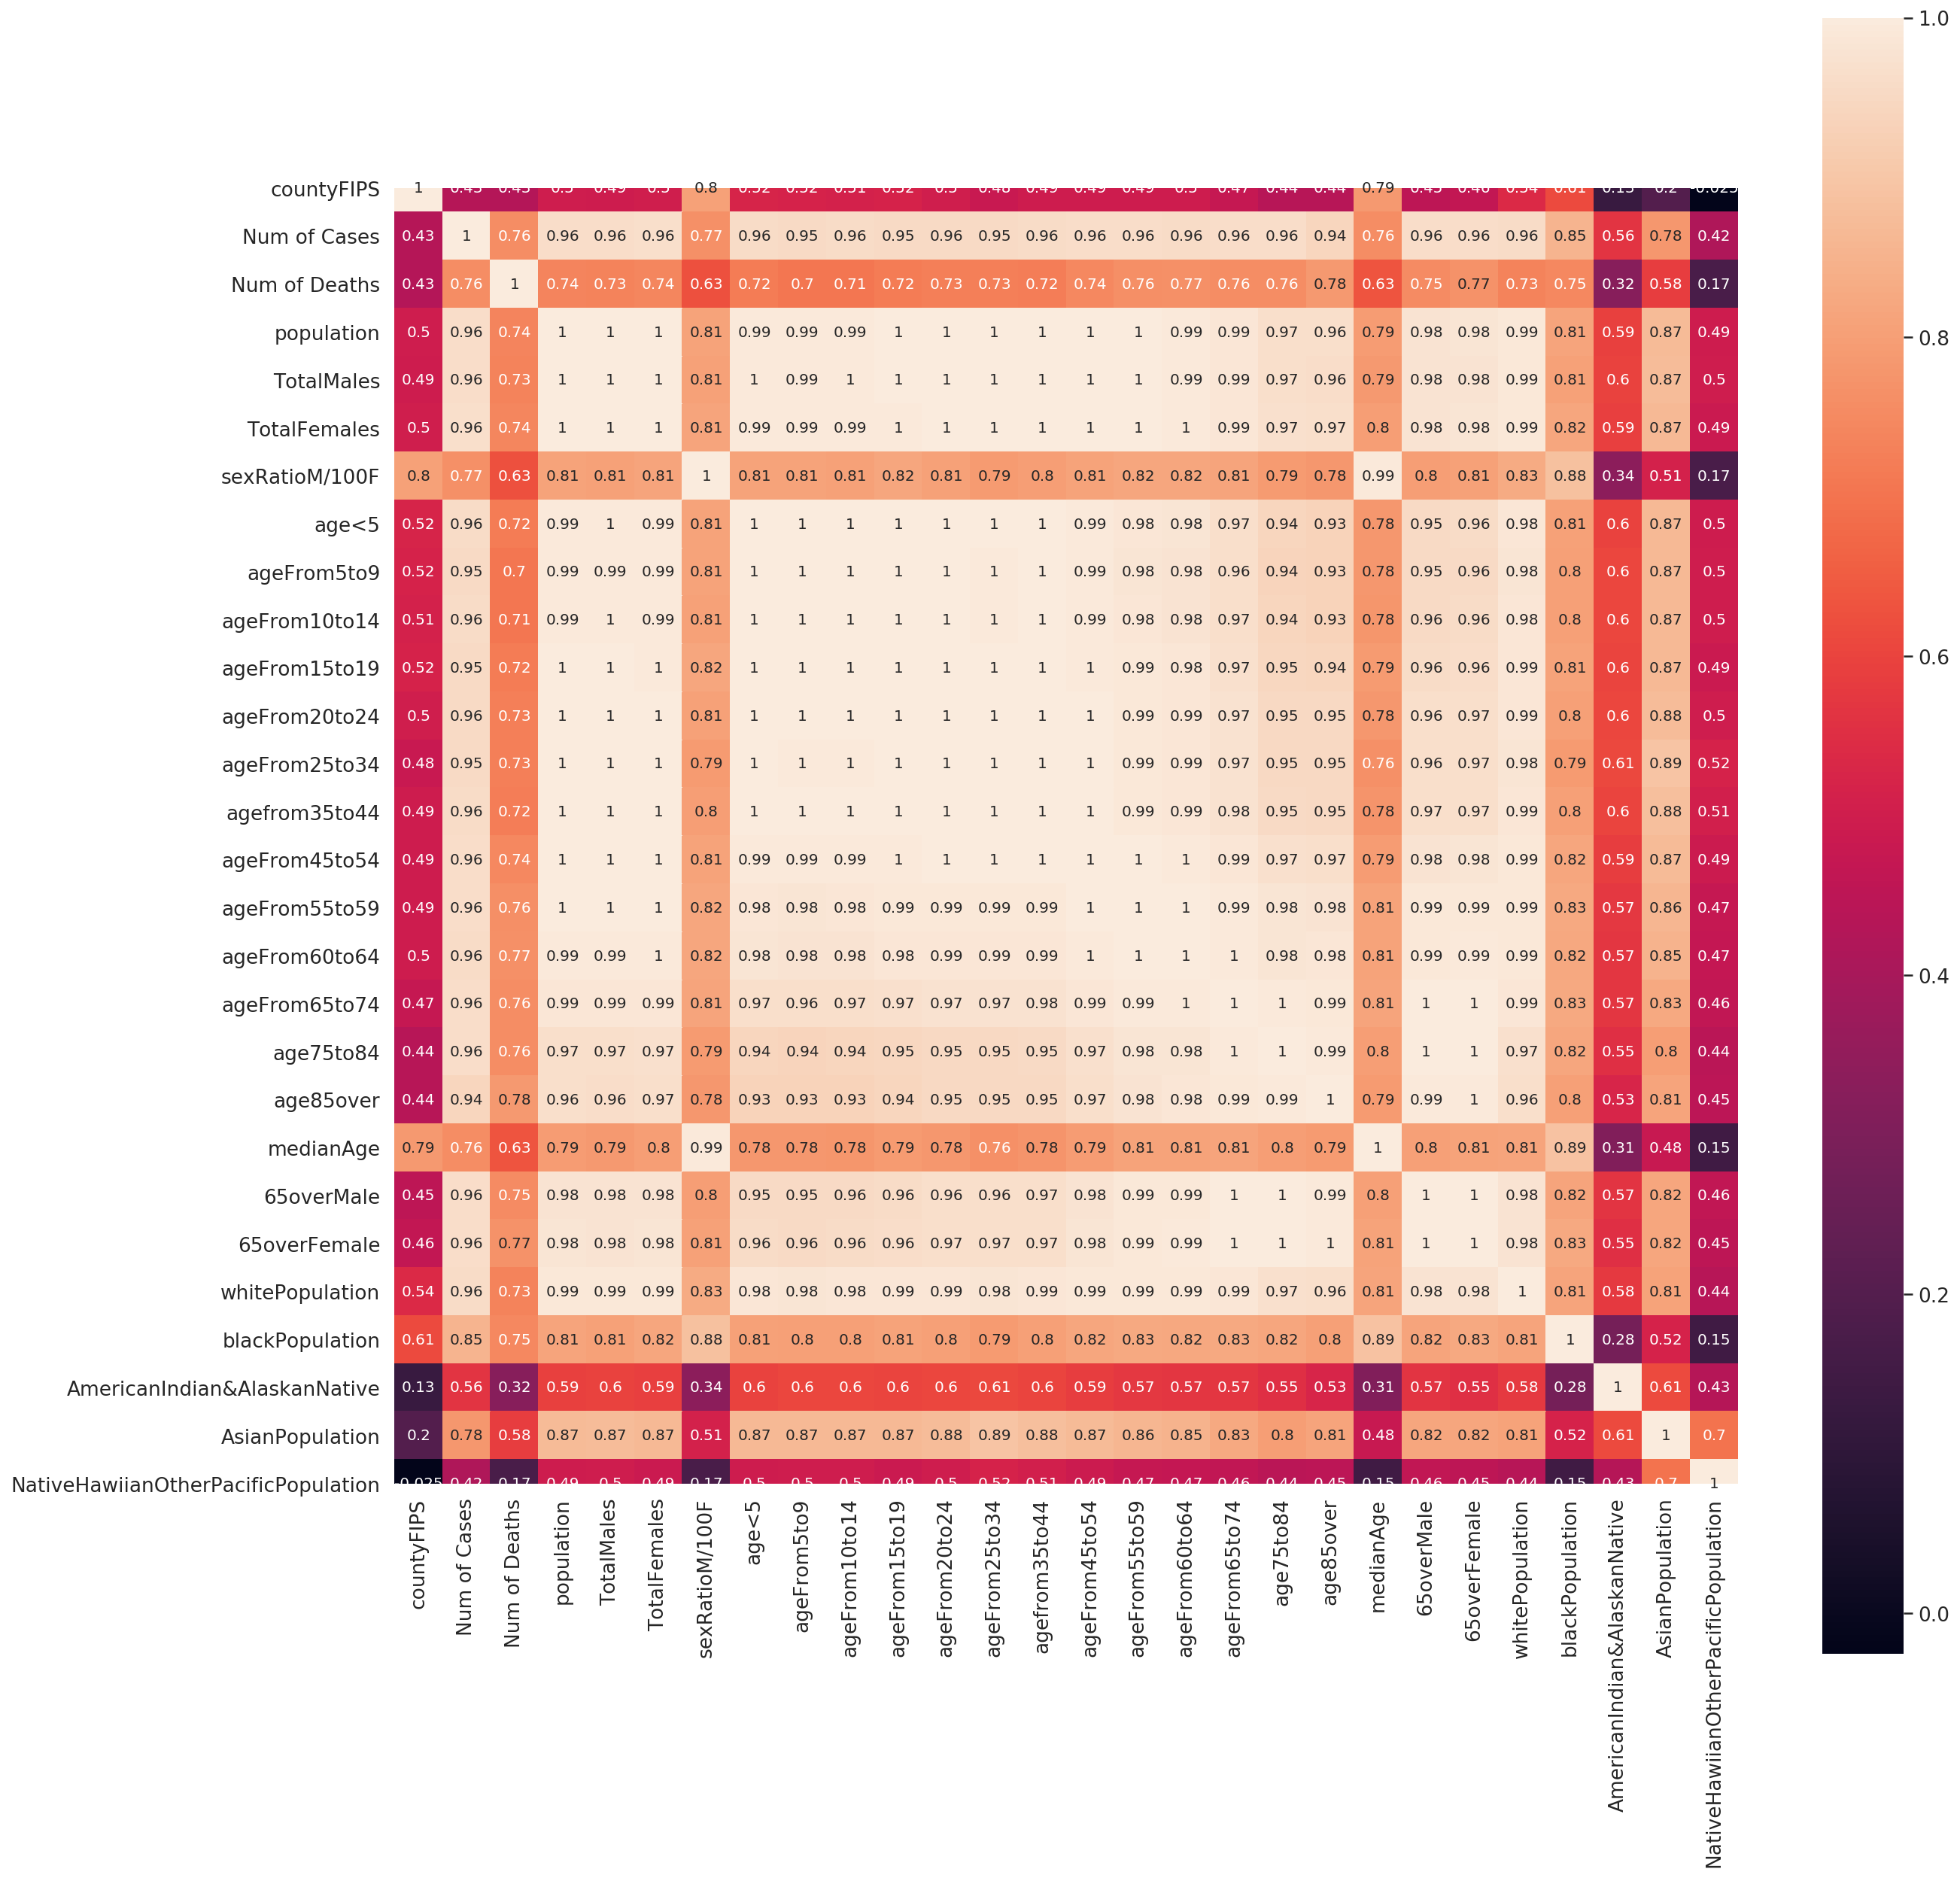

In [74]:
plt.figure(figsize=(20, 20))
#corrplot(mergedEnrichmentData_lastDate_groupedByState.corr(), size_scale=300);
sns.heatmap(corr, annot=True, square=True)

In [75]:
#hypothesis